In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
df=pd.read_csv("concord.csv");

In [25]:
df

,claim_uid,cord_uid,title,doi,numerical_claims,publish_time,authors,journal,country,institution
0,3vrndj,6lnxb0px,Synchronized Biventricular Heart Pacing in a C...,10.1038/s41598-020-59017-z,BiV pacing with LV-lead 20 ms and 40 ms are de...,2020-02-07,"Lyu, Hongming; John, Mathews; Burkland, David;...",Sci Rep,USA,University of California Los Angeles
1,7zkivf,6lnxb0px,Synchronized Biventricular Heart Pacing in a C...,10.1038/s41598-020-59017-z,The closed-chest pacing only requires the exte...,2020-02-07,"Lyu, Hongming; John, Mathews; Burkland, David;...",Sci Rep,USA,University of California Los Angeles
2,6zvpfq,4wuv6ntb,Blindness: behaviour in an epidemic(†),10.1093/pubmed/fdaa050,"In particular, we know that (i) the virus has ...",2020-05-13,"Zatta, Marta; Braut, Beatrice",J Public Health (Oxf),Italy,University Hospital of Trieste
3,9xtalf,4wuv6ntb,Blindness: behaviour in an epidemic(†),10.1093/pubmed/fdaa050,If the doctor in the novel pointed out: that h...,2020-05-13,"Zatta, Marta; Braut, Beatrice",J Public Health (Oxf),Italy,University Hospital of Trieste
4,4dmjgn,b8gm6cr6,Is Exercise the Best Medicine during a COVID-1...,10.3390/ijerph17165730,Data suggests that 74% of COVID-19 cases may b...,2020-08-08,"Hew-Butler, Tamara; Smith-Hale, Valerie; Van S...",Int J Environ Res Public Health,USA,Wayne State University
...,...,...,...,...,...,...,...,...,...,...
203534,1syibr,05dxn54t,A Patient With Bilateral Conjunctivitis Positi...,10.1097/ico.0000000000002485,The patient was followed up in the hospital fo...,2020-07-02,"Sirakaya, Ender; Sahiner, Mustafa; Aslan Sirak...",Cornea,Turkey,Health Science University
203535,6jepwy,05dxn54t,A Patient With Bilateral Conjunctivitis Positi...,10.1097/ico.0000000000002485,De Wit et al showed that another form of coron...,2020-07-02,"Sirakaya, Ender; Sahiner, Mustafa; Aslan Sirak...",Cornea,Turkey,Health Science University
203536,3zxhgf,05dxn54t,A Patient With Bilateral Conjunctivitis Positi...,10.1097/ico.0000000000002485,It is recommended that conjunctival samples be...,2020-07-02,"Sirakaya, Ender; Sahiner, Mustafa; Aslan Sirak...",Cornea,Turkey,Health Science University
203537,2ybntr,zpeij14g,Incidental lowering of otitis-media complaints...,10.1007/s00431-020-03747-9,In order to avoid leaving the patients to them...,2020-07-20,"Torretta, Sara; Capaccio, Pasquale; Coro, Ilar...",Eur J Pediatr,Italy,Fondazione IRCCS Ca' Granda Ospedale Maggiore ...


In [26]:
df.info

<bound method DataFrame.info of        claim_uid  cord_uid                                              title  \
0         3vrndj  6lnxb0px  Synchronized Biventricular Heart Pacing in a C...   
1         7zkivf  6lnxb0px  Synchronized Biventricular Heart Pacing in a C...   
2         6zvpfq  4wuv6ntb             Blindness: behaviour in an epidemic(†)   
3         9xtalf  4wuv6ntb             Blindness: behaviour in an epidemic(†)   
4         4dmjgn  b8gm6cr6  Is Exercise the Best Medicine during a COVID-1...   
...          ...       ...                                                ...   
203534    1syibr  05dxn54t  A Patient With Bilateral Conjunctivitis Positi...   
203535    6jepwy  05dxn54t  A Patient With Bilateral Conjunctivitis Positi...   
203536    3zxhgf  05dxn54t  A Patient With Bilateral Conjunctivitis Positi...   
203537    2ybntr  zpeij14g  Incidental lowering of otitis-media complaints...   
203538    4fhvyx  zpeij14g  Incidental lowering of otitis-media complaints...

In [27]:
df.describe()

,claim_uid,cord_uid,title,doi,numerical_claims,publish_time,authors,journal,country,institution
count,203539,203539,203539,203539,203539,203539,203539,203539,199487,196141
unique,203249,48711,48621,48711,203231,855,48123,4647,1277,15684
top,3qrotc,ub7bp0pt,Neuromodulation through brain stimulation-assi...,10.1136/bmjopen-2021-055038,Percentages may not total 100 because of round...,2021-02-03,"Thams, Friederike; Antonenko, Daria; Fleischma...",Int J Environ Res Public Health,USA,University of California
freq,2,90,90,90,9,633,90,9216,31742,1371


In [28]:
df.isnull().sum()

claim_uid              0
cord_uid               0
title                  0
doi                    0
numerical_claims       0
publish_time           0
authors                0
journal                0
country             4052
institution         7398
dtype: int64

In [29]:
print("Country distribution:\n", df['country'].value_counts())
print("Journal distribution:\n", df['journal'].value_counts())
print("Institution distribution:\n", df['institution'].value_counts())


Country distribution:
 country
USA                        31742
China                      20634
Italy                      12861
UK                          9696
India                       7649
                           ...  
Taiwan R.O.C                   1
Glasgow Royal Infirmary        1
China), China, China           1
USA, Egypt, USA                1
United States A R              1
Name: count, Length: 1277, dtype: int64
Journal distribution:
 journal
Int J Environ Res Public Health           9216
PLoS One                                  8796
Sci Rep                                   6093
Vaccines (Basel)                          2995
medRxiv                                   2611
                                          ... 
JMIR Nurs                                    1
Archives of Gerontology and Geriatrics       1
Russ J Dev Biol                              1
Neurodegener. dis. manag. (Online)           1
Bioinorg Chem Appl                           1
Name: count, Lengt

In [30]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

In [32]:
df['publish_year'] = df['publish_time'].dt.year
df['publish_month'] = df['publish_time'].dt.month

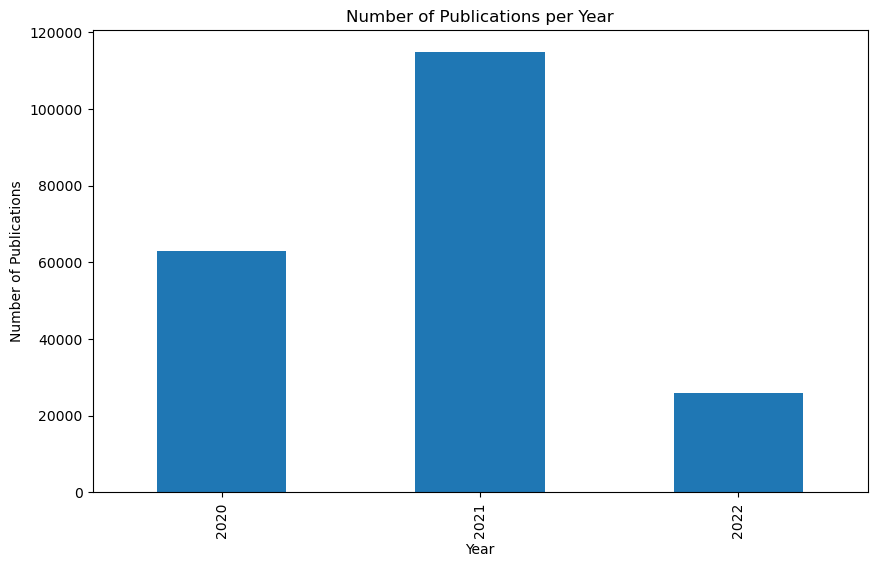

In [33]:
plt.figure(figsize=(10, 6))
df['publish_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Publications per Year")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.show()

<Figure size 1000x600 with 0 Axes>

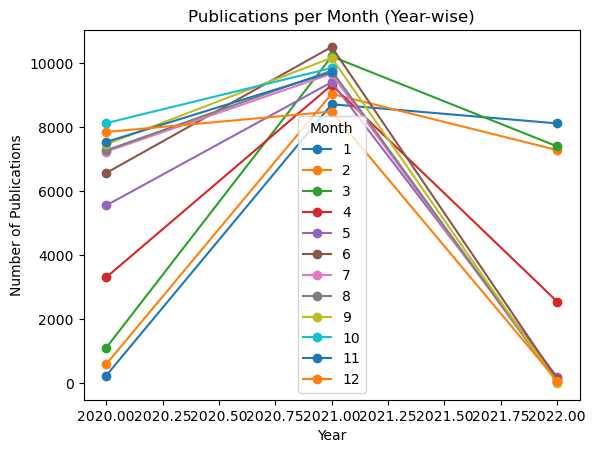

In [43]:
plt.figure(figsize=(10, 6))
df.groupby(['publish_year', 'publish_month']).size().unstack().plot(kind='line', marker='o')
plt.title("Publications per Month (Year-wise)")
plt.xlabel("Year")
plt.ylabel("Number of Publications")
plt.legend(title="Month")
plt.show()

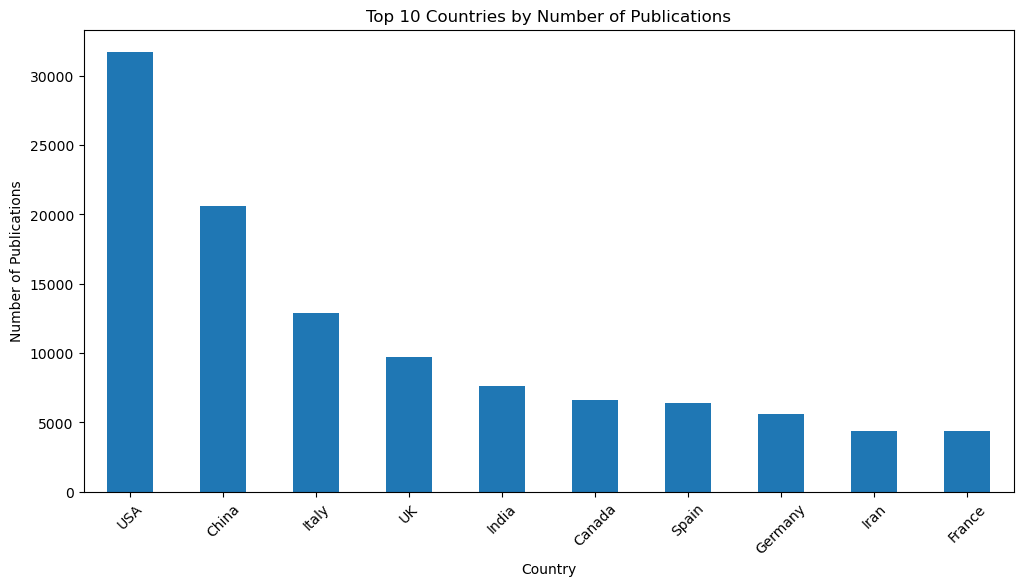

In [45]:
plt.figure(figsize=(12, 6))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Number of Publications")
plt.xlabel("Country")
plt.ylabel("Number of Publications")
plt.xticks(rotation=45)
plt.show()

In [47]:
df['num_authors'] = df['authors'].str.split(';').apply(len)
print(df['num_authors'].describe())


count    203539.000000
mean          8.076182
std           8.018779
min           1.000000
25%           4.000000
50%           6.000000
75%          10.000000
max         433.000000
Name: num_authors, dtype: float64


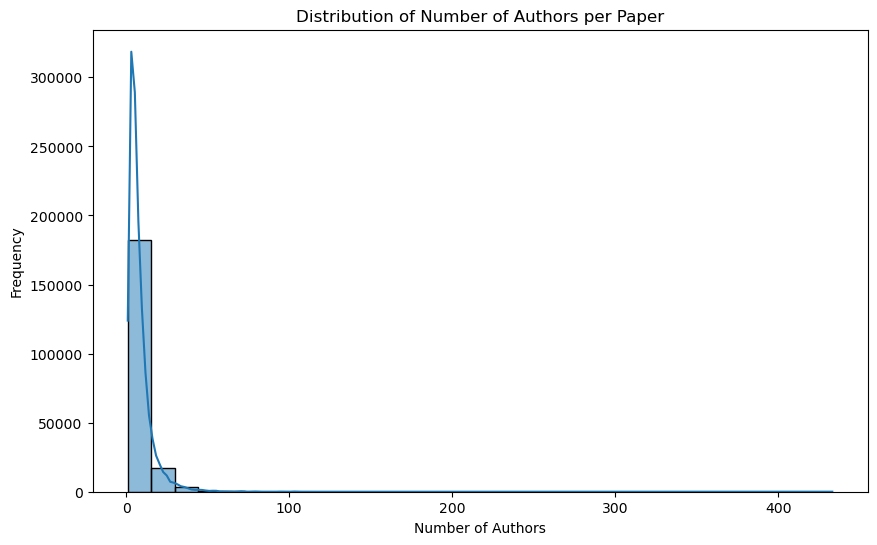

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(df['num_authors'], bins=30, kde=True)
plt.title("Distribution of Number of Authors per Paper")
plt.xlabel("Number of Authors")
plt.ylabel("Frequency")
plt.show()

In [51]:
df['claim_length'] = df['numerical_claims'].str.len()
print(df['claim_length'].describe())

count    203539.000000
mean        223.537582
std         110.427075
min          23.000000
25%         149.000000
50%         202.000000
75%         270.000000
max        1335.000000
Name: claim_length, dtype: float64


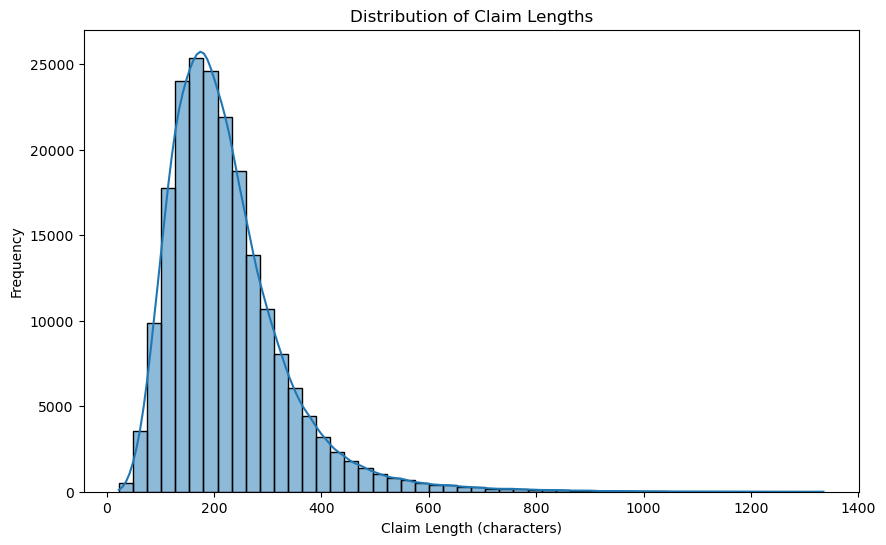

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df['claim_length'], bins=50, kde=True)
plt.title("Distribution of Claim Lengths")
plt.xlabel("Claim Length (characters)")
plt.ylabel("Frequency")
plt.show()

In [55]:
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df['numerical_claims'].dropna())

In [57]:
words = vectorizer.get_feature_names_out()
word_freq = X.sum(axis=0).A1
word_freq_df = pd.DataFrame(zip(words, word_freq), columns=["Word", "Frequency"]).sort_values(by="Frequency", ascending=False)


In [59]:
print(word_freq_df.head(10))

         Word  Frequency
1          19      43125
6       covid      42264
14   patients      34071
5         cov      23735
17       sars      23724
0          10      21515
18      study      15891
8        days      15325
11     higher      15153
12  infection      13783


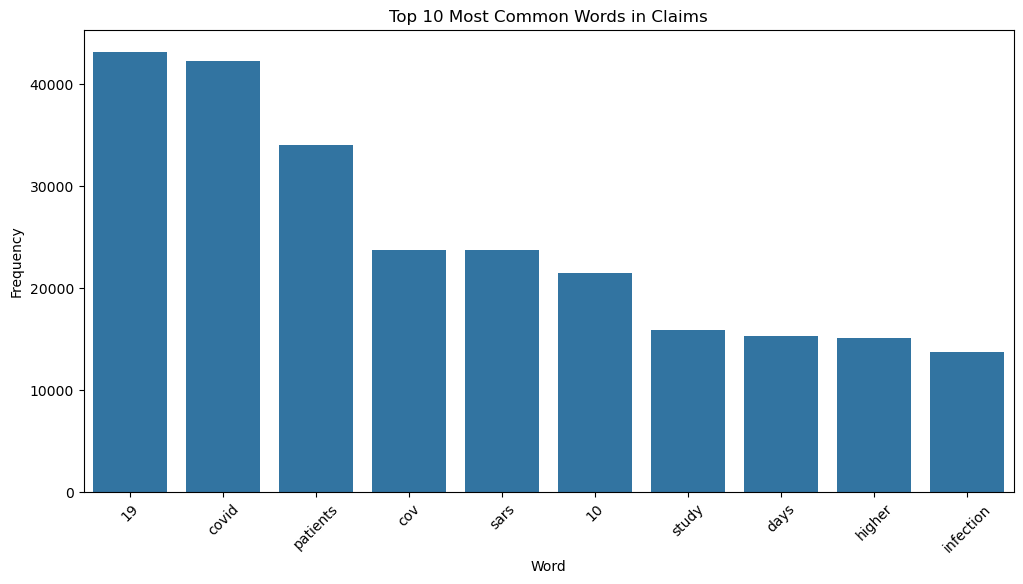

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Word", y="Frequency", data=word_freq_df.head(10))
plt.title("Top 10 Most Common Words in Claims")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()